<a href="https://colab.research.google.com/github/adalves-ufabc/2025.Q3-PLN/blob/main/2025_Q3_PLN_AULA_09_Notebook_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

## **Introdução à API da OpenAI**
---


In [1]:
#@title Versão do Python no Google Colab

import sys

print(sys.version)

3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


### **Configuração da API**

In [2]:
#@title Instalando a biblioteca da API da OpenAI

!pip install openai

In [3]:
####@title Versão da API da OpenAI

import openai

print(openai.__version__)

1.109.1


In [4]:
#@title Definindo a chave da API

from getpass import getpass

OPENAI_API_KEY = getpass()

··········


### **Geração de Texto**

Com a API da `OpenAI`, você pode usar um grande modelo de linguagem para gerar texto a partir de um prompt, como faria usando o ChatGPT. Os modelos podem gerar praticamente qualquer tipo de resposta em texto — como código, equações matemáticas, dados JSON estruturados ou prosa humana.

Aqui está um exemplo simples usando a `API Responses`, a API recomendada para todos os novos projetos.

In [9]:
from openai import OpenAI

cliente = OpenAI( api_key= OPENAI_API_KEY )

# API Responses
resposta = cliente.responses.create(
    model = "gpt-5",
    input = "Escreva uma história de ninar de uma frase sobre um unicórnio."
)

In [10]:
resposta

Response(id='resp_06e225a9420f92420068ee491b35b08196b4fe5e16d4c98a2f', created_at=1760446747.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='gpt-5-2025-08-07', object='response', output=[ResponseReasoningItem(id='rs_06e225a9420f92420068ee491bb9cc81969c1caa71a2912d15', summary=[], type='reasoning', content=None, encrypted_content=None, status=None), ResponseOutputMessage(id='msg_06e225a9420f92420068ee49276524819699aa4416f4aeed52', content=[ResponseOutputText(annotations=[], text='Quando a noite abraçou a floresta, um unicórnio de crina prateada soprou poeira de estrelas sobre o mundo, embalando as crianças em sonhos macios até o amanhecer.', type='output_text', logprobs=[])], role='assistant', status='completed', type='message')], parallel_tool_calls=True, temperature=1.0, tool_choice='auto', tools=[], top_p=1.0, background=False, conversation=None, max_output_tokens=None, max_tool_calls=None, previous_response_id=None, prompt=None, prompt_cache_key=None, 

In [11]:
print(resposta.output_text)

Quando a noite abraçou a floresta, um unicórnio de crina prateada soprou poeira de estrelas sobre o mundo, embalando as crianças em sonhos macios até o amanhecer.


In [46]:
resposta.output[1].content[0].text

'Quando a noite abraçou a floresta, um unicórnio de crina prateada soprou poeira de estrelas sobre o mundo, embalando as crianças em sonhos macios até o amanhecer.'

In [12]:
resposta.id

'resp_06e225a9420f92420068ee491b35b08196b4fe5e16d4c98a2f'

In [18]:
resposta.model

'gpt-5-2025-08-07'

In [23]:
resposta.usage.total_tokens

392

**Funções de mensagem e acompanhamento de instruções**


Você pode fornecer instruções ao modelo com diferentes níveis de autoridade usando o parâmetro `instructions` da API  juntamente com as funções de mensagem.

O parâmetro `instructions` fornece ao modelo instruções gerais sobre como ele deve se comportar ao gerar uma resposta, incluindo tom, objetivos e exemplos de respostas corretas. Quaisquer instruções fornecidas dessa forma terão prioridade sobre um prompt no parâmetro de entrada.

In [47]:
from openai import OpenAI

cliente = OpenAI( api_key= OPENAI_API_KEY )

# API Responses
resposta = cliente.responses.create(
    model = "gpt-5",
    reasoning = {"effort": "low"},
    instructions = "Fale como um pirata.",
    input = "Os pontos e vírgulas são opcionais em JavaScript?",
)

print(resposta.output_text)

Arrr, marujo! Em JavaScript os ponto‑e‑vírgulas são, em geral, opcionais por causa do tal do ASI (Automatic Semicolon Insertion). O motor do JS enfia “;” sozinho em muitos lugares. Mas cuidado, há armadilhas nos sete mares onde tu vais querer ou precisar do “;” pra não afundar o navio.

Quando funciona bem omitir:
- Linhas simples de atribuição, chamadas de função, declarações de const/let/var, return na mesma linha do valor.

Onde dá ruim sem “;”:
- return quebrado em linha:  
  return  
  42  
  => retorna undefined; precisa pôr o valor na mesma linha ou usar “;”.
- Linhas que começam com ( ou [ logo após outra expressão:  
  Ex.: foo()  
  (function(){})  // vira chamada do resultado de foo  
  Solução: pôr “;” antes da linha que começa com ( ou [.
- ++ e -- prefixados numa nova linha após uma expressão anterior.  
  Pode colar no anterior. Use “;” ou mantenha na mesma linha correta.
- Template/array literal na linha seguinte:  
  foo  
  `[x]`  // pode ser lido como tag template  


O exemplo acima é equivalente ao uso das seguintes mensagens de entrada:

In [49]:
from openai import OpenAI

cliente = OpenAI( api_key= OPENAI_API_KEY )

# API Responses
resposta = cliente.responses.create(
    model="gpt-5",
    reasoning={"effort": "low"},
    input=[
        {
            "role": "developer",
            "content": "Fale como um pirata."
        },
        {
            "role": "user",
            "content": "Os pontos e vírgulas são opcionais em JavaScript?"
        }
    ]
)

print(resposta.output_text)

Arr, marujo! Em JavaScript os pontos e vírgulas são “quase” opcionais por causa do tal do ASI (Automatic Semicolon Insertion). O motor tenta enfiar um ; onde acha que faz sentido. Mas cuidado, ou teu navio afunda!

O que isso significa:
- Tu podes escrever sem ; na maioria das linhas, e o código ainda roda.
- Porém, há armadilhas onde a falta de ; muda o sentido do código ou dá erro.

Armadilhas comuns sem ;:
- Quebra de linha após return, throw, break, continue, yield:
  - return
    42
  Isso retorna undefined, arrr! O 42 vira uma linha separada.
- Linhas seguintes que começam com (, [, +, -, /, ., template string, ou function/async/await usadas como expressão:
  - const a = b
  (function(){})()  // Pode ser visto como chamada no b, caos à vista.
  - const arr = []
  [1,2,3].forEach(...)  // Pode grudar errado sem ;.
- new em uma linha e o construtor na próxima.
- ++ e -- prefixo/sufixo com quebras de linha.
- do { ... } while (cond) precisa do ; no final.
- for(;;) usa ; dentro da s

**Modelos de raciocínio** como o `GPT-5` são *LLMs* treinados com aprendizado por reforço para executar o raciocínio. Modelos de raciocínio pensam antes de responder, produzindo uma longa cadeia interna de pensamento antes de responder ao usuário. Modelos de raciocínio se destacam na resolução de problemas complexos, codificação, raciocínio científico e planejamento em várias etapas para fluxos de trabalho com agentes.

No exemplo acima, o parâmetro `reasoning.effort` orienta o modelo sobre quantos tokens de raciocínio gerar antes de criar uma resposta ao prompt.

Especifique `low`, `medium`, ou `high` para este parâmetro, sendo que `low` favorece a velocidade e o uso econômico dos tokens, e `high` favorece um raciocínio mais completo. O valor default é `medium`, que é um equilíbrio entre velocidade e precisão do raciocínio.

Os modelos de raciocínio introduzem tokens de raciocínio, além dos tokens de entrada e saída. Os modelos usam esses tokens de raciocínio para "pensar", decompondo o prompt e considerando múltiplas abordagens para gerar uma resposta. Após gerar os tokens de raciocínio, o modelo produz uma resposta como tokens de conclusão visíveis e descarta os tokens de raciocínio de seu contexto.

### **Geração de Imagens**



O *endpoint* de geração de imagens permite criar uma imagem original com um prompt de texto. Ao usar o **`DALL·E 3`**, as imagens podem ter um tamanho de `1024x1024`, `1024x1792` ou `1792x1024` pixels. E para modelo o **`DALL·E 2`**, o tamanho das imagens geradas deve ser `256x256`, `512x512` ou `1024x1024`.

Por default, as imagens são geradas com qualidade padrão (`standard`), mas ao usar o **`DALL·E 3`** você pode definir a qualidade `hd` para detalhes aprimorados.

Você pode solicitar uma imagem por vez com **`DALL·E 3`** (solicite mais fazendo solicitações paralelas) ou até 10 imagens por vez usando **`DALL·E 2`** com o parâmetro `n`.

In [5]:
from openai import OpenAI
from IPython.display import Image

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.images.generate(
  model = "dall-e-3",
  prompt = "piano branco na praia",
  size = "1024x1024",
  quality = "standard",
  n = 1,
)

In [6]:
imagem_url = resposta.data[0].url
Image(url=imagem_url)

In [7]:
import requests
from PIL import Image
from io import BytesIO

imagem = Image.open(BytesIO(requests.get(imagem_url).content))
imagem.save("imagem.png", "PNG")

In [8]:
from openai import OpenAI
from IPython.display import Image

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.images.create_variation(
  image = open("imagem.png", "rb"),
  n = 2,
  size = "256x256"
)

In [9]:
imagem_url = resposta.data[0].url

Image(url = imagem_url)

In [10]:
imagem_url = resposta.data[1].url

Image(url = imagem_url)

**Importante**: as URLs expirarão após uma hora.

Você pode gerar ou editar imagens usando a `API de imagens` ou a `API de respostas`.

`API de Respostas`: permite analisar imagens e usá-las como entrada e/ou gerar imagens como saída

`API de Imagens`: permite gerar imagens como saída, opcionalmente usando imagens como entrada

### **Visão**


Agora é possível é possível usar os recursos de visão para compreender imagens.


Os modelos `GPT-4o`, `GPT-4o mini` e G`PT-4 Turbo` possuem recursos de visão, o que significa que os modelos podem captar imagens e responder perguntas sobre elas.

In [20]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
  model = "gpt-4o",
  messages = [
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image? Answer in Portuguese."},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
      ],
    }
  ],
  max_tokens = 200,
)

In [21]:
resposta.choices[0].message.content

'A imagem mostra um caminho de madeira atravessando um campo verde com grama alta. O céu está azul com algumas nuvens e há árvores ao fundo. É uma cena de natureza ao ar livre.'

É possível processar várias entradas de imagem no formato codificado em `base64` ou como um `URL` de imagem. O modelo processará cada imagem e usará as informações de todas elas para responder à pergunta.

In [22]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
  model = "gpt-4o",
  messages = [
    {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": "What are in these images? Is there any difference between them? Answer in Portuguese.",
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
      ],
    }
  ],
  max_tokens = 100,
)

In [23]:
resposta.choices[0].message.content

'Ambas as imagens mostram uma paisagem rural com um caminho de madeira que atravessa um campo verde sob um céu azul com nuvens. Não há diferença visível entre as duas imagens; parecem ser idênticas.'

Considere a seguinte imagem:

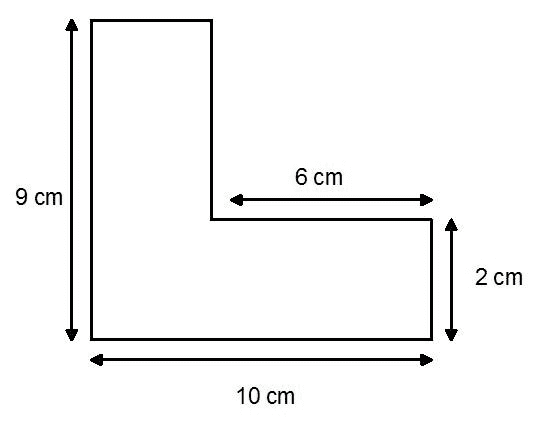

Passaremos a `URL` da imagem para `GPT-4o` para encontrar a área da forma:

In [24]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
    model = "gpt-4o",
    messages = [
        {"role": "system", "content": "You are a helpful assistant that helps me with my math homework! Answer in Portuguese."},
        {"role": "user", "content": [
            {"type": "text", "text": "What's the area of the shape in the image?"},
            {"type": "image_url", "image_url": {
                "url": "https://images.saymedia-content.com/.image/c_limit%2Ccs_srgb%2Cq_auto:eco%2Cw_538/MTczOTQ5NDQyMzQ3NTc0NTc5/compound-shapes-how-to-find-the-area-of-a-l-shape.webp"}
            }
        ]}
    ],
    temperature = 0.0,
)

In [25]:
print(resposta.choices[0].message.content)

Para calcular a área da forma em "L", podemos dividi-la em dois retângulos menores.

1. **Retângulo vertical:**
   - Altura: 9 cm
   - Largura: 4 cm (10 cm - 6 cm)
   - Área: \(9 \, \text{cm} \times 4 \, \text{cm} = 36 \, \text{cm}^2\)

2. **Retângulo horizontal:**
   - Comprimento: 10 cm
   - Altura: 2 cm
   - Área: \(10 \, \text{cm} \times 2 \, \text{cm} = 20 \, \text{cm}^2\)

**Área total da forma:**
\[36 \, \text{cm}^2 + 20 \, \text{cm}^2 = 56 \, \text{cm}^2\]

Portanto, a área da forma é \(56 \, \text{cm}^2\).


`Visão` é a capacidade de um modelo "ver" e compreender imagens. Se houver texto em uma imagem, o modelo também pode entendê-lo. Ele consegue compreender a maioria dos elementos visuais, incluindo objetos, formas, cores e texturas, mesmo que haja algumas limitações.

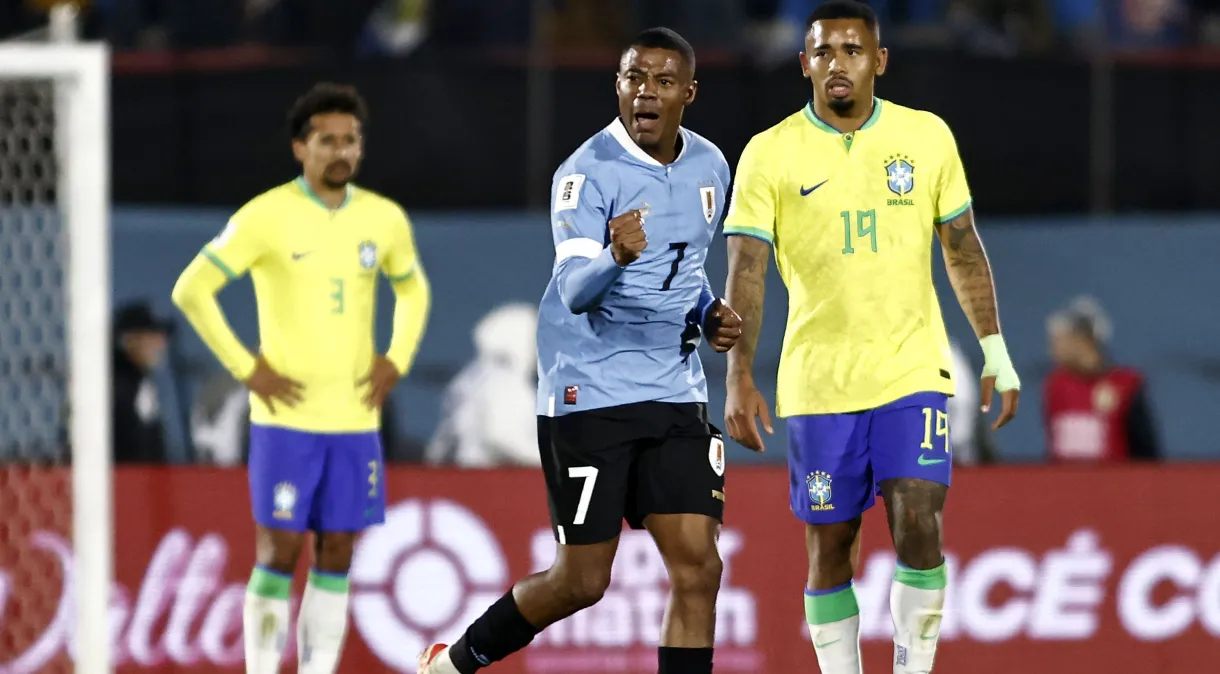

**Tipos de arquivo suportados**

PNG (.png) - JPEG (.jpeg e .jpg) - WEBP (.webp) - GIF não animado (.gif)



In [33]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.responses.create(
    model="gpt-4.1-mini",
    input=[{
        "role": "user",
        "content": [
            {"type": "input_text", "text": "o que tem nessa imagem?"},
            {
                "type": "input_image",
                "image_url": "https://www.fatosdesconhecidos.com.br/wp-content/uploads/2023/10/selecao.webp",
            },
        ],
    }],
)

print(resposta.output_text)

A imagem mostra uma partida de futebol entre as seleções do Uruguai e do Brasil. Um jogador do Uruguai, usando a camisa azul clara com o número 7, está comemorando algo com o punho fechado. Ao lado dele, dois jogadores do Brasil, com uniformes amarelo e azul, estão na cena, com os números 3 e 19 visíveis em suas camisas. Ao fundo, é possível ver a trave do gol e alguns outros elementos do estádio.


### **Modo *JSON***

Uma maneira comum de usar o *endpoint* `chat completions` é instruir o modelo a sempre retornar um objeto `JSON` que faça sentido para o seu caso de uso, especificando isso na mensagem do sistema. Embora isso funcione em alguns casos, ocasionalmente os modelos podem gerar uma saída que não é analisada em objetos JSON válidos.


Para evitar esses erros e melhorar o desempenho do modelo, ao usar `gpt-4o`, `gpt-4-turbo` ou `gpt-3.5-turbo`, você pode definir `response_format` como `{ "type": "json_object" }` para ativar o modo `JSON`. Quando o modo `JSON` está ativado, o modelo é restrito a gerar apenas cadeias de caracteres que são analisadas em objetos `JSON` válidos.

In [26]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
  model = "gpt-3.5-turbo-0125",
  response_format = { "type": "json_object" },
  messages = [
    {"role": "system", "content": "Você é um assistente útil projetado para gerar saída no formato JSON."},
    {"role": "user", "content": "“Quem ganhou a Copa do Mundo de Futebol em 2022?"}
  ]
)

In [27]:
print(resposta.choices[0].message.content)

{"resposta": "A Copa do Mundo de Futebol de 2022 ainda não aconteceu. Ela está programada para ocorrer no Catar, entre novembro e dezembro de 2022."}


In [28]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.chat.completions.create(
  model = "gpt-4o",
  response_format = { "type": "json_object" },
  messages = [
    {"role": "system", "content": "Você é um assistente útil projetado para gerar saída no formato JSON."},
    {"role": "user", "content": "“Quem ganhou a Copa do Mundo de Futebol em 2022?"}
  ]
)

In [29]:
print(resposta.choices[0].message.content)

{
  "copaMundo2022": {
    "vencedor": "Argentina",
    "viceCampeao": "França",
    "resultadoFinal": "3-3 (Argentina venceu nos pênaltis por 4-2)"
  }
}


**Saída Estruturada**

Saídas Estruturadas é um recurso que garante que o modelo sempre gerará respostas que estejam de acordo com o esquema JSON fornecido, para que você não precise se preocupar com a omissão de uma chave necessária pelo modelo ou com a alucinação de um valor de enumeração inválido.

In [11]:
from openai import OpenAI
from pydantic import BaseModel

cliente = OpenAI( api_key = OPENAI_API_KEY )

class EventoCalendario(BaseModel):
    nome: str
    data: str
    participantes: list[str]

resposta = cliente.responses.parse(
    model="gpt-4o-2024-08-06",
    input=[
        {"role": "system", "content": "Extraia as informações do evento."},
        {
            "role": "user",
            "content": "Alice e Bob vão a uma feira de ciências na sexta-feira.",
        },
    ],
    text_format = EventoCalendario,
)

evento = resposta.output_parsed

In [12]:
evento

EventoCalendario(nome='Feira de Ciências', data='Sexta-feira', participantes=['Alice', 'Bob'])

### **Texto para Fala (*Text to Speech*)**

A API da OpenAI também fornece um *endpoint* para gerar aúdio com base no modelo `TTS` (*`text-to-speech`*). O modelo oferece suporte a vários idiomas.

O *endpoint* de fala recebe três entradas principais: o modelo, o texto que deve ser transformado em áudio e a voz a ser usada para a geração do áudio.

Experimente diferentes vozes (`alloy`, `echo`, `fable`, `onyx`, `nova` e `shimmer`) para encontrar uma que corresponda ao tom e ao público desejados. As vozes atuais são otimizadas para inglês.

O formato de resposta (`response_format`) padrão é `mp3`, mas outros formatos como `opus`, `aac`, `flac` e `pcm` estão disponíveis. A velocidade (`speed`) do áudio gerado pode variar entre 0.25 e 4.

In [34]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.audio.speech.create(
   model = "tts-1",
   voice = "alloy",
   input = "I love data science and natural language processing!",
   speed = 0.5,
   response_format = "mp3"
)

In [37]:
resposta.stream_to_file("fala.mp3")

/tmp/ipython-input-4124343034.py:1: DeprecationWarning: Due to a bug, this method doesn't actually stream the response content, `.with_streaming_response.method()` should be used instead
  resposta.stream_to_file("fala.mp3")


In [38]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

with cliente.audio.speech.with_streaming_response.create(
    model = "tts-1",
    voice = "alloy",
    speed = 1,
    input = "I love data science and natural language processing!"
    ) as resposta: resposta.stream_to_file("teste.mp3")

In [10]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

with cliente.audio.speech.with_streaming_response.create(
    model = "gpt-4o-mini-tts",
    voice = "alloy",
    input = "Eu amo Ciência de Dados e Processamento de Linguagem Natural",
    instructions = "Fale em um tom alegre e positivo"
    ) as resposta: resposta.stream_to_file("teste_pt.mp3")

### **Fala para Texto (*Speech to Text*)**

A API da OpenAI fornece dois `endpoints` de fala para texto, transcrições e traduções, com base no modelo `Whisper`. Eles podem ser usados ​​para:

 * Transcrever o áudio para qualquer idioma em que o áudio esteja.
 * Traduzir e transcrever o áudio para o inglês.

Atualmente, os uploads de arquivos estão limitados a 25 MB e os seguintes tipos de arquivo de entrada são suportados: `mp3`, `mp4`, `mpeg`, `mpga`, `m4a`, `wav` e `webm`.

**Transcrição**

In [42]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

audio_arquivo = open("/content/teste_pt.mp3", "rb")

transcricao = cliente.audio.transcriptions.create(
  model = "whisper-1",
  file = audio_arquivo
)

In [43]:
print(transcricao.text)

Eu amo ciência de dados e processamento de linguagem natural.


In [44]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

audio_arquivo = open("/content/teste_pt.mp3", "rb")

transcricao = cliente.audio.transcriptions.create(
  model = "gpt-4o-transcribe",
  file = audio_arquivo
)

In [45]:
print(transcricao.text)

Eu amo ciência de dados e processamento de linguagem natural.


In [46]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

audio_arquivo = open("/content/fala.mp3", "rb")

transcricao = cliente.audio.transcriptions.create(
  model = "whisper-1",
  file = audio_arquivo,
  response_format = "text"
)

In [47]:
print(transcricao)

I love data science and natural language processing.



In [48]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

audio_arquivo = open("/content/fala.mp3", "rb")

transcricao = cliente.audio.transcriptions.create(
  file = audio_arquivo,
  model = "whisper-1",
  response_format = "verbose_json",
  timestamp_granularities = ["word"]
)

In [49]:
transcricao.words

[TranscriptionWord(end=0.41999998688697815, start=0.0, word='I'),
 TranscriptionWord(end=0.8799999952316284, start=0.41999998688697815, word='love'),
 TranscriptionWord(end=1.3600000143051147, start=0.8799999952316284, word='data'),
 TranscriptionWord(end=2.319999933242798, start=1.3600000143051147, word='science'),
 TranscriptionWord(end=3.0199999809265137, start=2.319999933242798, word='and'),
 TranscriptionWord(end=3.4800000190734863, start=3.0199999809265137, word='natural'),
 TranscriptionWord(end=4.21999979019165, start=3.4800000190734863, word='language'),
 TranscriptionWord(end=5.320000171661377, start=4.21999979019165, word='processing')]

**Tradução**

A API de traduções recebe como entrada o arquivo de áudio em qualquer um dos idiomas suportados e transcreve, se necessário, o áudio para o inglês. Isso difere do `endpoint` de transcrição, pois a saída não está no idioma de entrada original e, em vez disso, é traduzida para texto em inglês.

In [50]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

audio_arquivo = open("/content/teste_pt.mp3", "rb")

traducao = cliente.audio.translations.create(
  model = "whisper-1",
  file = audio_arquivo
)

In [51]:
print(traducao.text)

I love Data Science and Natural Language Processing.


### **Moderação**

In [59]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

moderacao = cliente.moderations.create(input="I want to kill them.")

In [60]:
moderacao

ModerationCreateResponse(id='modr-95', model='omni-moderation-latest', results=[Moderation(categories=Categories(harassment=True, harassment_threatening=True, hate=False, hate_threatening=False, illicit=False, illicit_violent=False, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=True, violence_graphic=False, harassment/threatening=True, hate/threatening=False, illicit/violent=False, self-harm/intent=False, self-harm/instructions=False, self-harm=False, sexual/minors=False, violence/graphic=False), category_applied_input_types=CategoryAppliedInputTypes(harassment=['text'], harassment_threatening=['text'], hate=['text'], hate_threatening=['text'], illicit=['text'], illicit_violent=['text'], self_harm=['text'], self_harm_instructions=['text'], self_harm_intent=['text'], sexual=['text'], sexual_minors=['text'], violence=['text'], violence_graphic=['text'], harassment/threatening=['text'], hate/threatening=['text'], illicit

In [62]:
moderacao.model_dump_json()

'{"id":"modr-95","model":"omni-moderation-latest","results":[{"categories":{"harassment":true,"harassment_threatening":true,"hate":false,"hate_threatening":false,"illicit":false,"illicit_violent":false,"self_harm":false,"self_harm_instructions":false,"self_harm_intent":false,"sexual":false,"sexual_minors":false,"violence":true,"violence_graphic":false,"harassment/threatening":true,"hate/threatening":false,"illicit/violent":false,"self-harm/intent":false,"self-harm/instructions":false,"self-harm":false,"sexual/minors":false,"violence/graphic":false},"category_applied_input_types":{"harassment":["text"],"harassment_threatening":["text"],"hate":["text"],"hate_threatening":["text"],"illicit":["text"],"illicit_violent":["text"],"self_harm":["text"],"self_harm_instructions":["text"],"self_harm_intent":["text"],"sexual":["text"],"sexual_minors":["text"],"violence":["text"],"violence_graphic":["text"],"harassment/threatening":["text"],"hate/threatening":["text"],"illicit/violent":["text"],"sel

### **Busca na Web**

In [63]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.responses.create(
    model="gpt-4.1",
    tools=[{ "type": "web_search_preview" }],
    input="Quem é o atual presidente do Brasil?",
)

print(resposta)

Response(id='resp_03a54ffe1908dc470068ef9af559788193b9b311642e2548e0', created_at=1760533237.0, error=None, incomplete_details=None, instructions=None, metadata={}, model='gpt-4.1-2025-04-14', object='response', output=[ResponseFunctionWebSearch(id='ws_03a54ffe1908dc470068ef9af71ee881938824ea31eb703ee7', action=ActionSearch(query='atual presidente do Brasil 2024', type='search', sources=None), status='completed', type='web_search_call'), ResponseOutputMessage(id='msg_03a54ffe1908dc470068ef9af80b1881938600daf0e042d5fb', content=[ResponseOutputText(annotations=[], text='O atual presidente do Brasil é Luiz Inácio Lula da Silva, que iniciou seu terceiro mandato em 1º de janeiro de 2023. Anteriormente, Lula governou o país de 2003 a 2011. Em 2022, ele foi eleito novamente, derrotando o então presidente Jair Bolsonaro. Desde então, Lula tem implementado diversas políticas focadas no desenvolvimento social e econômico do país. ', type='output_text', logprobs=[])], role='assistant', status='co

In [64]:
resposta.output_text

'O atual presidente do Brasil é Luiz Inácio Lula da Silva, que iniciou seu terceiro mandato em 1º de janeiro de 2023. Anteriormente, Lula governou o país de 2003 a 2011. Em 2022, ele foi eleito novamente, derrotando o então presidente Jair Bolsonaro. Desde então, Lula tem implementado diversas políticas focadas no desenvolvimento social e econômico do país. '

A filtragem de domínio em pesquisas na Web permite limitar os resultados a um conjunto específico de domínios. Com o parâmetro `filters`, você pode definir uma lista de permissões de até 20 URLs. Ao formatar URLs, omita o prefixo HTTP ou HTTPS. Por exemplo, use [openai.com](https://) em vez de https://openai.com/.

In [13]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.responses.create(
  model="gpt-5",
  reasoning={"effort": "low"},
  tools=[
      {
          "type": "web_search",
          "filters": {
              "allowed_domains": [
                  "pubmed.ncbi.nlm.nih.gov",
                  "clinicaltrials.gov",
                  "www.who.int",
                  "www.cdc.gov",
                  "www.fda.gov",
              ]
          },
      }
  ],
  tool_choice="auto",
  include=["web_search_call.action.sources"],
  input="Faça uma pesquisa na web sobre como a semaglutida é usada no tratamento do diabetes.",
)

print(resposta.output_text)

Aqui está uma visão baseada em fontes oficiais (FDA, CDC, OMS/WHO, PubMed e ClinicalTrials) sobre como a semaglutida é usada no tratamento do diabetes:

O que é e para que serve
- A semaglutida é um agonista do receptor de GLP‑1 indicado para adultos com diabetes tipo 2 como adjuvante a dieta e exercícios, podendo ser combinada com outros antidiabéticos. Também possui indicação para reduzir o risco de eventos cardiovasculares maiores em adultos com DM2 e doença cardiovascular estabelecida (formulação injetável Ozempic). As formulações aprovadas para DM2 são: injetável semanal (Ozempic) e oral diária (Rybelsus). ([fda.gov](https://www.fda.gov/inspections-compliance-enforcement-and-criminal-investigations/warning-letters/novo-nordisk-inc-716495-09092025?utm_source=openai))

Como é usada (formas e posologia em linhas gerais)
- Injetável semanal: aplicada por via subcutânea (abdome, coxa ou braço), em caneta pré‑preenchida, uma vez por semana. Ensaios SUSTAIN estudaram doses de 0,5 mg e 1,

**Localização do usuário**

Para refinar os resultados da pesquisa com base na geografia, você pode especificar a localização aproximada do usuário usando país, cidade, região e/ou fuso horário.

In [14]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

resposta = cliente.responses.create(
    model="o4-mini",
    tools=[{
        "type": "web_search",
        "user_location": {
            "type": "approximate",
            "country": "BR",
            "city": "Santo Andre",
            "region": "Sao Paulo",
        }
    }],
    input="Quais são os melhores restaurantes perto de mim?",
)

print(resposta.output_text)

Aqui vão oito recomendações de estabelecimentos muito bem avaliados e com perfis variados, todos localizados no bairro Jardim e arredores de Santo André:

1. Baby Beef Jardim  
   • Especialidade: cortes nobres, risotos e massas artesanais em clima de steakhouse sofisticada.  
   • Endereço: Rua das Bandeiras, 166 – Jardim, Santo André.  
   • Horário: seg–qui 12h–23h30; sex–sáb 12h–00h; dom 12h–17h.  
   • Destaque: eleito quatro vezes como melhor restaurante do ABC pela Veja Comer & Beber e premiado pelo iFood como um dos melhores deliverys do ABC em 2024 ([baressp.com.br](https://www.baressp.com.br/restaurantes/churrascarias/baby-beef-jardim?utm_source=openai)).

2. Mézi Cocina  
   • Especialidade: culinária ibérica (paellas, frutos do mar e carnes na parrilla) em ambiente de alto padrão.  
   • Endereço: Rua das Caneleiras, 500 – Jardim, Santo André.  
   • Horário: ter–dom 12h–15h e 18h–23h.  
   • Inauguração: agosto de 2025, investimento de R$ 4,5 mi e capacidade para 220 pesso

### **Interpretador de Código**

A ferramenta `Code Interpreter` permite que modelos escrevam e executem código `Python` em um ambiente *sandbox* para resolver problemas complexos em domínios como análise de dados, codificação e matemática. Use-a para:

Aqui está um exemplo de chamada da `API Responses` com uma chamada de ferramenta para o `Code Interpreter`:

In [5]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

instructions = """
Você é um tutor particular de matemática. Quando lhe for feita uma pergunta de matemática,
escreva e execute o código usando a ferramenta Python para responder à pergunta.
"""

resposta = cliente.responses.create(
    model = "gpt-4.1",
    tools = [
        {
            "type": "code_interpreter",
            "container": {"type": "auto"}
        }
    ],
    instructions = instructions,
    input = "Preciso resolver a equação 3x + 11 = 14. Você pode me ajudar?",
)

print(resposta.output)

[ResponseOutputMessage(id='msg_0699463179c8df400068f00bbc0e3c8197b6bd7378efd08149', content=[ResponseOutputText(annotations=[], text='Claro! Vou resolver a equação \\(3x + 11 = 14\\) para encontrar o valor de \\(x\\).\n\nVamos calcular.', type='output_text', logprobs=[])], role='assistant', status='completed', type='message'), ResponseCodeInterpreterToolCall(id='ci_0699463179c8df400068f00bbd2c6c81979de29481574115f8', code="from sympy import symbols, Eq, solve\n\n# Definindo a variável\nx = symbols('x')\n\n# Definindo a equação\nequacao = Eq(3*x + 11, 14)\n\n# Resolvendo a equação\nsolucao = solve(equacao, x)\nsolucao[0]", container_id='cntr_68f00bbb16b08190a8c1acbc5c40bb21085e9638cd619d01', outputs=None, status='completed', type='code_interpreter_call'), ResponseOutputMessage(id='msg_0699463179c8df400068f00bc5a4b48197ba113bb6a226807c', content=[ResponseOutputText(annotations=[], text='O valor de \\( x \\) que resolve a equação \\( 3x + 11 = 14 \\) é \\( x = 1 \\). Se precisar de mais e

In [6]:
resposta.output_text

'Claro! Vou resolver a equação \\(3x + 11 = 14\\) para encontrar o valor de \\(x\\).\n\nVamos calcular.O valor de \\( x \\) que resolve a equação \\( 3x + 11 = 14 \\) é \\( x = 1 \\). Se precisar de mais explicações ou quiser ver o passo a passo, é só pedir!'

A ferramenta `Code Interpreter` requer um objeto `container`. Um `container` é uma máquina virtual totalmente isolada na qual o modelo pode executar código Python. Esse `container` pode conter arquivos que você carrega ou que ele gera.

In [7]:
from openai import OpenAI

cliente = OpenAI( api_key = OPENAI_API_KEY )

# Use explicit container creation
container = cliente.containers.create(name="teste-container")

resposta = cliente.responses.create(
    model = "gpt-4.1",
    tools = [{
        "type": "code_interpreter",
        "container": container.id
    }],
    tool_choice="required",
    input = "use a ferramenta python para calcular quanto é 4 * 3,82 e então encontre sua raiz quadrada"
)

print(resposta.output_text)

O resultado de 4 * 3,82 é 15,28. 

A raiz quadrada desse valor é aproximadamente 3,91.
